<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Step 4:</span> Cluster Analysis</h1>


For clustering problems, the chosen input features are usually more important than which algorithm you use.
* We'll apply the K-Means algorithm to 3 different feature sets.
* because there a're no "ground truth" labels, there are no clear, widely-accepted performance metrics for clusters.
* Even so, there are soft ways to compare the different clusters created from the 3 different feature sets.



Summary:
1. [K-Means](#k-means)
2. [Base features](#base)
3. [Threshold features](#threshold)
4. [PCA features](#pca)
5. [Model comparison](#comparison)


### First, let's import libraries and load the datasets.

First, import libraries that you'll need.

In [8]:
# Imporitng Ze libraries

# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd
# Matplotlib for visualization
import matplotlib.pyplot as plt
# display plots in the notebook
%matplotlib inline
# Seaborn for easier visualization
import seaborn as sns
# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler
# ScikitLearn's make_pipeline 
from sklearn.pipeline import make_pipeline

**Importing the  3 CSV files we've saved throughout this project.**
* <code style="color:crimson">'analytical_base_table.csv'</code> (created in Step 1) as <code style="color:steelblue">base_df</code>. 
* <code style="color:crimson">'threshold_item_data.csv'</code> (created in Step 2) as <code style="color:steelblue">threshold_item_data</code>. 
*  <code style="color:crimson">'pca_item_data.csv'</code> (created in Step 3) as <code style="color:steelblue">pca_item_data</code>. 
* <code style="color:steelblue">index_col=0</code> for each one to use CustomerID as the index.

In [9]:
# Import analytical base table
base_df = pd.read_csv('analytical_base_table.csv')
# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv')
# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv')

**Print the shape of each one to make sure we're on the same page.**

In [10]:
# Print shape of each dataframe
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)

(414, 9)
(414, 21)
(414, 201)


# 1. K-Means

Typically, the best clustering model is the one that creates clusters that are intuitive and reasonable in the eyes of the key stakeholder (i.e. our client, the online gift retailer).

Consequently, which algorithm you choose is typically less important than the **input features** that you feed into it. We will use K-means.

K-Means works as follows:

1. declare a hyperparameter kk, the number of different clusters you want.
2. The algorithm initializes kk random points in your feature space (called centroids).
3. For each observation in your dataset, its distance to each centroid is calculated.
4. Each observation is assigned to the cluster of its closest centroid.
5. Then, each centroid is shifted to the mean of the observations assigned to that cluster.
6. Repeating Steps (3) - (5) until the centroids no longer shift. --

In short, this process produces kk clusters that "clump together" observations based on distance.
<br>

 K-Means creates clusters based on distances, and because distances are calculated by between observations defined by their feature values, the features inputed into the algorithm heavily influence the clusters that are created.
 
We'll try clustering using our 3 different dataset:
1. Only purchase pattern features ("Base DF")
2. Purchase pattern features + item features chosen by thresholding ("Threshold DF")
3. Purchase pattern features + principal component features from items ("PCA DF")
 
**Using the <code style="color:steelblue">base_df</code> --->** 
**We'll create a <code style="color:steelblue">threshold_df</code> by joining it with <code style="color:steelblue">threshold_item_data</code>.**

In [22]:
# Join base_df with threshold_item_data
threshold_df = pd.merge(base_df, threshold_item_data, on='CustomerID')
# Display first 5 rows of threshold_df
threshold_df.head()

,CustomerID,total_transactions,total_unique_products,total_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
0,12347,7,103,182,4310.00,23.681319,615.714286,224.82,1294.32,0,...,0,0,0,0,5,0,0,4,0,0
1,12348,4,22,31,1797.24,57.975484,449.310000,227.44,892.80,0,...,0,0,0,0,0,0,0,0,0,4
2,12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,...,0,0,0,0,0,1,1,1,1,1
3,12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,...,0,1,0,0,0,0,0,0,0,1
4,12352,8,59,85,2506.04,29.482824,313.255000,120.33,840.30,0,...,0,0,0,0,1,0,0,2,0,5


**Creating <code style="color:steelblue">pca_df</code> by joining <code style="color:steelblue">base_df</code> with <code style="color:steelblue">pca_item_data</code>.**

In [23]:
# Join base_df with pca_item_data
pca_df = pd.merge(base_df, pca_item_data, on='CustomerID')
# Display first 5 rows of pca_df
pca_df.head()

,CustomerID,total_transactions,total_unique_products,total_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC27,...,PC74,PC92,PC115,PC153,PC21,PC154,PC181,PC79,PC90,PC83
0,12347,7,103,182,4310.00,23.681319,615.714286,224.82,1294.32,5.876140,...,0.285553,-0.036518,0.304538,0.066348,0.091724,0.081520,0.031085,-0.026535,0.348184,-0.175728
1,12348,4,22,31,1797.24,57.975484,449.310000,227.44,892.80,-4.219837,...,0.460968,-4.765365,0.181128,-0.060220,2.299782,0.318007,-4.587247,7.146414,-2.880113,-1.147965
2,12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260846,...,-0.858036,3.032593,0.626667,-4.306286,-0.254076,-0.276820,-2.182513,2.463688,-0.178603,-0.136216
3,12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929320,...,0.796385,0.850550,0.382694,-1.900388,0.025241,2.102687,0.208891,-1.107115,-1.130929,3.428857
4,12352,8,59,85,2506.04,29.482824,313.255000,120.33,840.30,-2.053114,...,1.952904,-0.335511,1.161181,-0.013836,1.580158,1.933953,-0.662787,1.746364,-0.679615,-0.423264


# 2. Base DF

First set of features we'll consider as **"Base DF"**. 
* This only includes the purchase pattern features from our analytical base table.


In [20]:
# First 5 observations of base_df
base_df.head()

,CustomerID,total_transactions,total_unique_products,total_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
0,12347,7,103,182,4310.00,23.681319,615.714286,224.82,1294.32
1,12348,4,22,31,1797.24,57.975484,449.310000,227.44,892.80
2,12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
3,12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
4,12352,8,59,85,2506.04,29.482824,313.255000,120.33,840.30


As we see our variables are on distinct scales. K-Means calculates clusters based on distances, so we will scale our features before fitting the model as large unscaled feature (with large variances) will to dominate our algorithm.

**Initializing the model pipeline for K-Means.**
* Adjusting the number of clusters hyperparameter $k$.
* Setting <code style="color:steelblue">random_state=0</code> for replicable results. 

In [26]:
# K-Means model pipeline
from sklearn.cluster import KMeans
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3))

**fitting the model from our pipeline**

In [27]:
# Fit K-Means pipeline
k_means.fit(base_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

**Saving the clusters to our dataframe.**

In [28]:
# Save clusters to base_df
base_df['clusters'] = k_means.predict(base_df)
# Display first 5 rows of base_df
base_df.head()

,CustomerID,total_transactions,total_unique_products,total_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,clusters
0,12347,7,103,182,4310.00,23.681319,615.714286,224.82,1294.32,1
1,12348,4,22,31,1797.24,57.975484,449.310000,227.44,892.80,0
2,12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
3,12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
4,12352,8,59,85,2506.04,29.482824,313.255000,120.33,840.30,0


**Visualizing our clusters on a scatterplot and color the points by cluster.**
* Since it's impossible to visualize all of the features, we'll pick the 2 features we believe most important:  <code style="color:steelblue">total_sales and avg_cart_value</code>.
* <code style="color:steelblue">hue=</code> argument to color by cluster.

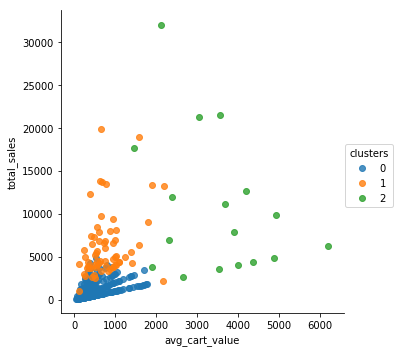

In [32]:
# Scatterplot, colored by cluster
sns.lmplot(x='avg_cart_value',y='total_sales', hue='clusters', data=base_df, fit_reg=False)

# 3. Threshold DF

The second set of features to cluster is **"Threshold DF"**. 
* It includes the purchase pattern features from our analytical base table.
* It also includes the purchase counts for the 20 most popular items.

In [55]:
# K-Means model pipeline
k_means2 = make_pipeline(StandardScaler(), KMeans(n_clusters=3))

**fitting the K-Means model pipeline**

In [56]:
# Fit K-Means pipeline
k_means2.fit(threshold_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

**Save the clusters to <code style="color:steelblue">threshold_df</code>.**

In [57]:
# Save clusters to threshold_df
threshold_df['clusters'] = k_means2.predict(threshold_df)

# Display first 5 rows of threshold_df
threshold_df.head()

,CustomerID,total_transactions,total_unique_products,total_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,...,22629,22328,21731,22556,22554,22423,22326,POST,cluster,clusters
0,12347,7,103,182,4310.00,23.681319,615.714286,224.82,1294.32,0,...,0,0,5,0,0,4,0,0,0,0
1,12348,4,22,31,1797.24,57.975484,449.310000,227.44,892.80,0,...,0,0,0,0,0,0,0,4,0,0
2,12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,...,0,0,0,1,1,1,1,1,0,0
3,12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,...,0,0,0,0,0,0,0,1,0,0
4,12352,8,59,85,2506.04,29.482824,313.255000,120.33,840.30,0,...,0,0,1,0,0,2,0,5,0,0


**Visualizing the scatterplot and color the points by cluster to compare between our different ABT clusterings**
* Using the same 2 features as in the scatterplot above to visually contrast the plots.
* Using the same <code style="color:steelblue">hue=</code> argument to color by cluster.

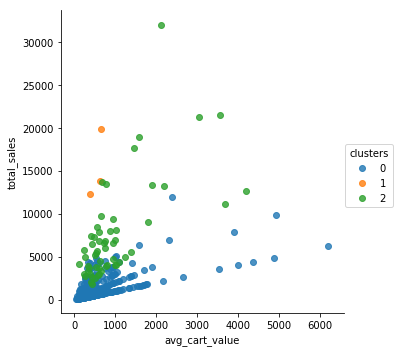

In [58]:
# Scatterplot, colored by cluster
sns.lmplot(x='avg_cart_value',y='total_sales', hue='clusters', data=threshold_df, fit_reg=False)

# 4. PCA DF

Last set of features we'll consider is our **"PCA DF"**. 
* It includes the purchase pattern features from our analytical base table.
* It includes the first 200 principal component features from the item data.


In [59]:
# K-Means model pipeline
k_means3 = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
k_means3.fit(pca_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

**Save the clusters to <code style="color:steelblue">pca_df</code>.**

In [60]:
# Save clusters to pca_df
pca_df['clusters'] = k_means3.predict(pca_df)
# Display first 5 rows of pca_df
pca_df.head()

,CustomerID,total_transactions,total_unique_products,total_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC27,...,PC92,PC115,PC153,PC21,PC154,PC181,PC79,PC90,PC83,clusters
0,12347,7,103,182,4310.00,23.681319,615.714286,224.82,1294.32,5.876140,...,-0.036518,0.304538,0.066348,0.091724,0.081520,0.031085,-0.026535,0.348184,-0.175728,0
1,12348,4,22,31,1797.24,57.975484,449.310000,227.44,892.80,-4.219837,...,-4.765365,0.181128,-0.060220,2.299782,0.318007,-4.587247,7.146414,-2.880113,-1.147965,1
2,12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260846,...,3.032593,0.626667,-4.306286,-0.254076,-0.276820,-2.182513,2.463688,-0.178603,-0.136216,0
3,12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929320,...,0.850550,0.382694,-1.900388,0.025241,2.102687,0.208891,-1.107115,-1.130929,3.428857,1
4,12352,8,59,85,2506.04,29.482824,313.255000,120.33,840.30,-2.053114,...,-0.335511,1.161181,-0.013836,1.580158,1.933953,-0.662787,1.746364,-0.679615,-0.423264,1


**Visualzing again these clusters and coloring points by cluster.**
* Using the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Using the <code style="color:steelblue">hue=</code> argument to color by cluster.

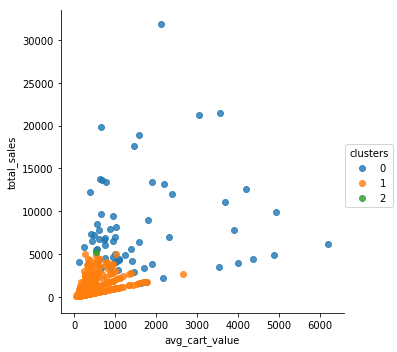

In [61]:
# Scatterplot, colored by cluster
sns.lmplot(x='avg_cart_value',y='total_sales', hue='clusters', data=pca_df, fit_reg=False)

# 5. Model comparison

As we see, all our clustering models are different.

Each of those 3 dataframes have the same indices:

In [62]:
# Check all indices are identical
print( all( base_df.index == threshold_df.index ) )
print( all( base_df.index == pca_df.index) )

True
True


**Using the adjusted Rand index between base_df.cluster and threshold_df.cluster to compare clusterings**

**Note:** The adjusted Rand index is **symmetric**,it is not significant the order we pass our clusters.

In [69]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.clusters, threshold_df.clusters)

0.59134501481484181

In [72]:
# Similary between threshold_df.cluster and base_df.cluster
adjusted_rand_score(threshold_df.clusters, pca_df.clusters)

0.52680817399985014

In [73]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.clusters, pca_df.clusters)


0.7016418093328558

* Which clusters are more like the ones created from the the base dataframe?

Essential steps
* Brign together the different customer-level ABT's.
* Use inuitition behind the K-Means algorithm.
* Apply the K-Means algorithm to different constructed ABT's from the same dataset.
* Compare the consensus (or lack thereof) of the clusters created.